In [15]:
import os
import numpy as np
from numpy.linalg import eigvalsh
import math
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, kron
from itertools import product, combinations
import plotly.graph_objects as go
from scipy.linalg import expm, sinm, cosm

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 14})  # Change 12 to the desired font size
# Enable LaTeX rendering in Matplotlib
plt.rc('text', usetex=True)
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.set_printoptions(edgeitems=10)  # Set the number of elements at the beginning and end of each dimension when repr is called
np.set_printoptions(threshold=1000)  # Set the total number of array elements which trigger summarization rather than full repr
np.set_printoptions(precision=4)  # Set the precision for floating point output

ar = np.array
kr = np.kron
T = np.transpose

from MDS import *

pauli_z=ar([[1,0],[0,-1]])
pauli_y=ar([[0,-1j],[1j,0]])
pauli_x=ar([[0,1],[1,0]])

import warnings
warnings.filterwarnings('ignore')

mds_from_d_3D = MDS(3,dissimilarity='euclidean')
mds_from_d_2D = MDS(2,dissimilarity='euclidean')


Rather than averaging the couplings, we use multiple instances (k=0 to k=12) goe_xxyyzz and average over the stress. We also repeat this for goe_local2

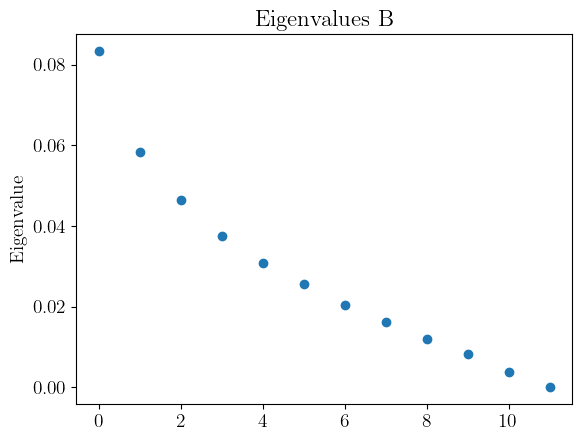

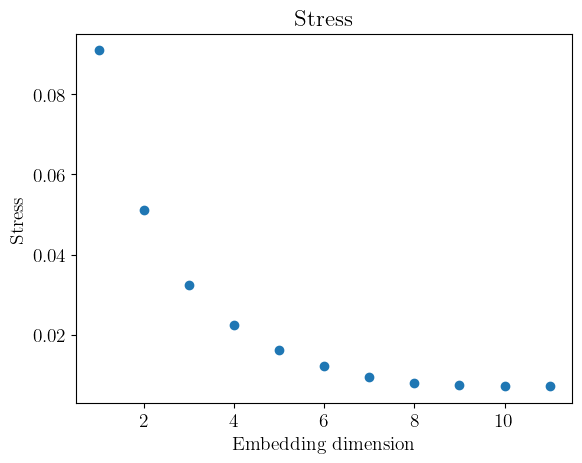

In [18]:
range_k=100
folder = 'goe_xxyyzz'
N=12
state_number=0
eigen_avg=np.zeros(N)
stress_avg=np.zeros(N-1)
for k in range(range_k):
    file_name=folder+f"{N}_{k}_{state_number}"
    dab=load_d(file_name)
    stress_avg+=get_stress(dab,False)
    eigen_avg+=get_eigenvalues_B_from_dab(dab,N,file_name,False)
eigen_avg=eigen_avg/(N*max(eigen_avg))
stress_avg=stress_avg/((N-1)*max(stress_avg))
plt.scatter(range(len(eigen_avg)),eigen_avg)
plt.title("Eigenvalues B")
plt.ylabel("Eigenvalue")
output_dir = 'plots'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it does not exist
plt.savefig(os.path.join(output_dir, f'eigenvalues_goe_xxyyzz_avg.png'))
plt.show()

plt.scatter(range(1,len(stress_avg)+1),stress_avg)
plt.title("Stress")
plt.xlabel("Embedding dimension")
plt.ylabel("Stress")
output_dir = 'plots'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it does not exist
plt.savefig(os.path.join(output_dir, f'stress_goe_xxyyzz_avg.png'))
plt.show()


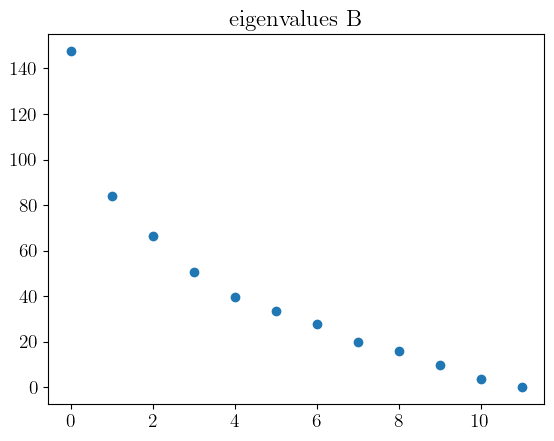

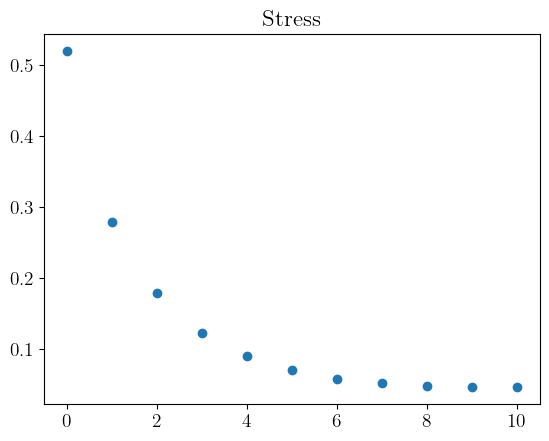

In [7]:
range_k=100
folder = 'goe_local2'
N=12
state_number=0
eigen_avg=np.zeros(N)
stress_avg=np.zeros(N-1)
for k in range(range_k):
    file_name=folder+f"{N}_{k}_{state_number}"
    dab=load_d(file_name)
    stress_avg+=get_stress(dab,False)
    eigen_avg+=get_eigenvalues_B_from_dab(dab,N,file_name,False)
eigen_avg=eigen_avg/(range_k)
stress_avg=stress_avg/(range_k)
plt.scatter(range(len(eigen_avg)),eigen_avg)
plt.title("Eigenvalues B")
plt.ylabel("Eigenvalue")
output_dir = 'plots'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it does not exist
plt.savefig(os.path.join(output_dir, f'eigenvalues_goe_local2_avg.png'))
plt.show()

plt.scatter(range(1,len(stress_avg)+1),stress_avg)
plt.title("Stress")
plt.xlabel("Embedding dimension")
plt.ylabel("Stress")
output_dir = 'plots'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it does not exist
plt.savefig(os.path.join(output_dir, f'stress_goe_local2_avg.png'))
plt.show()


We also look at the goe_local2 N=14

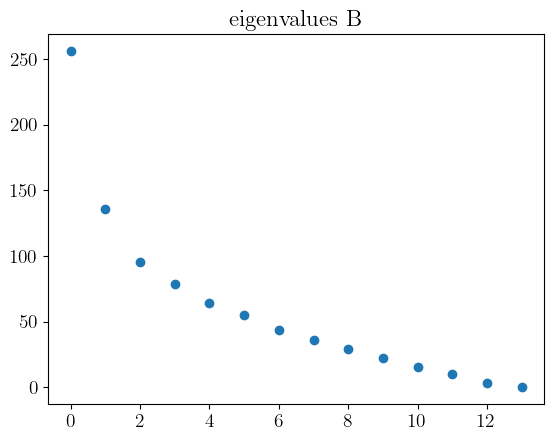

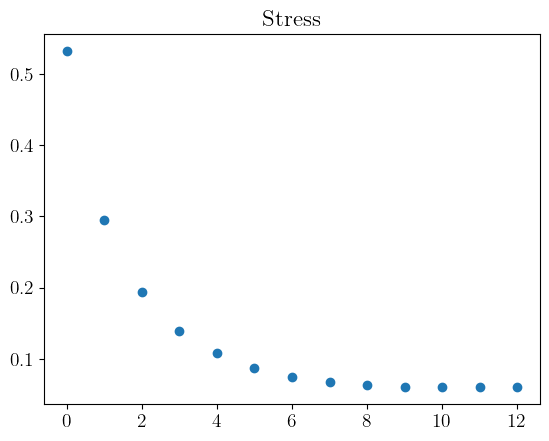

In [12]:
N = 14
range_k=22
folder = 'goe_local2'
state_number=0

eigen_avg=np.zeros(N)
stress_avg=np.zeros(N-1)
for k in range(range_k):
    file_name=folder+f"{N}_{k}_{state_number}"
    dab=load_d(file_name)
    stress_avg+=get_stress(dab,False)
    eigen_avg+=get_eigenvalues_B_from_dab(dab,N,file_name,False)

eigen_avg=eigen_avg/(range_k)
stress_avg=stress_avg/(range_k)
plt.scatter(range(len(eigen_avg)),eigen_avg)
plt.title("eigenvalues B")
plt.show()

plt.scatter(range(len(stress_avg)),stress_avg)
plt.title("Stress")
plt.show()


We now test for the sphere being agood fit. 

One way to compare our result is to see what the stress of a sphere with a bit of noise would be...

In [10]:
def sphereFit(spX,spY,spZ):
    #   Assemble the A matrix
    spX = np.array(spX)
    spY = np.array(spY)
    spZ = np.array(spZ)
    A = np.zeros((len(spX),4))
    A[:,0] = spX*2
    A[:,1] = spY*2
    A[:,2] = spZ*2
    A[:,3] = 1

    #   Assemble the f matrix
    f = np.zeros((len(spX),1))
    f[:,0] = (spX*spX) + (spY*spY) + (spZ*spZ)
    C, residules, rank, singval = np.linalg.lstsq(A,f)

    #   solve for the radius
    t = (C[0]*C[0])+(C[1]*C[1])+(C[2]*C[2])+C[3]
    radius = math.sqrt(t)

    # Calculate the residuals
    fittedX = C[0]
    fittedY = C[1]
    fittedZ = C[2]
    fitted_radius = radius

    residuals = np.sqrt((spX - fittedX)**2 + (spY - fittedY)**2 + (spZ - fittedZ)**2) - fitted_radius
    rmse = np.sqrt(np.mean(residuals**2))

    return radius, C[0], C[1], C[2], rmse

#Another simple way to compare them would be to see what the number of points in a sphere half the radius is.

def count_points_in_sphere(X, Y, Z, radius):
    # Convert X, Y, Z to numpy arrays if they are not already
    X = np.array(X)
    Y = np.array(Y)
    Z = np.array(Z)
    
    # Calculate the distance from the origin for each point
    distances = np.sqrt(X**2 + Y**2 + Z**2)
    # Count how many distances are less than or equal to the radius
    count = np.sum(distances <= radius)
    
    return count


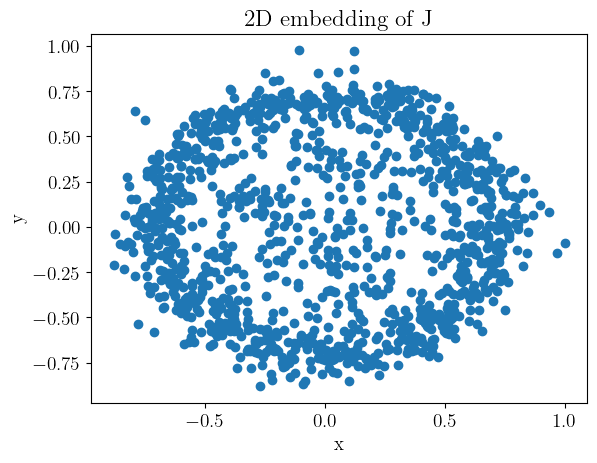

Number of points 1200
RMSE of the cloud points to a sphere: 
0.07385382485572352
Number of points in a sphere of radius 0.5: 


1

In [21]:
range_k=100
folder = 'goe_xxyyzz'
N=12
state_number=0

X3_long=[]
X2_long=[]
m_list=[]
m1_list=[]
for k in range(range_k):
    file_name=folder+f"{N}_{k}_{state_number}"
    dab=load_d(file_name)
    X2,X3,m1,m=mapData(dab,False)
    X3_long.append(X3)
    X2_long.append(X2)
    m_list.append(m)
    m1_list.append(m1)
X3_long_array=np.concatenate(X3_long, axis=0)
X2_long_array=np.concatenate(X2_long, axis=0)

m=max(m_list)
m1=max(m1_list)

plt.scatter(X2_long_array[:,0]/m1,X2_long_array[:,1]/m1)
plt.title("2D embedding of J")
plt.xlabel("x")
plt.ylabel("y")
output_dir = 'plots'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it does not exist
plt.savefig(os.path.join(output_dir, f'2D_embedding_xxyyzz_I_avg.png'))
plt.show()

fig = go.Figure(data=go.Scatter3d(x=X3_long_array[:, 0]/m, y=X3_long_array[:, 1]/m, z=X3_long_array[:, 2]/m, mode='markers',marker=dict(size=2)))

fig.update_layout(
scene=dict(
            xaxis=dict(range=[-1, 1]),
            yaxis=dict(range=[-1, 1]),
            zaxis=dict(range=[-1, 1]),
            aspectmode='cube'))
        
fig.show()

r,x0,y0,z0, rmse=sphereFit(X3_long_array[:,0]/m,X3_long_array[:,1]/m,X3_long_array[:,2]/m)
print(f"Number of points {range_k*12}")
print("RMSE of the cloud points to a sphere: ")
print(rmse)
print("Number of points in a sphere of radius 0.5: ")
count_points_in_sphere(X3_long_array[:,0]/m, X3_long_array[:,1]/m, X3_long_array[:,2]/m, 0.5)

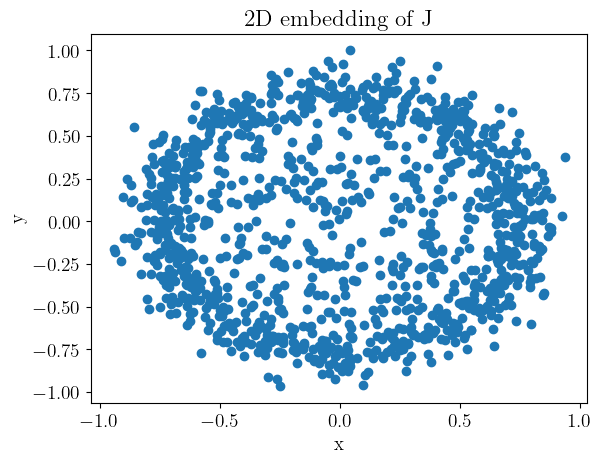

Number of points 1200
RMSE of the cloud points to a sphere: 
0.08234584874221854
Number of points in a sphere of radius 0.5: 


0

In [22]:
range_k=100
folder = 'goe_local2'
N=12
state_number=0

X3_long=[]
X2_long=[]
m_list=[]
m1_list=[]
for k in range(range_k):
    file_name=folder+f"{N}_{k}_{state_number}"
    dab=load_d(file_name)
    X2,X3,m1,m=mapData(dab,False)
    X3_long.append(X3)
    X2_long.append(X2)
    m_list.append(m)
    m1_list.append(m1)
X3_long_array=np.concatenate(X3_long, axis=0)
X2_long_array=np.concatenate(X2_long, axis=0)

m=max(m_list)
m1=max(m1_list)

plt.scatter(X2_long_array[:,0]/m1,X2_long_array[:,1]/m1)
plt.title("2D embedding of J")
plt.xlabel("x")
plt.ylabel("y")
output_dir = 'plots'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it does not exist
plt.savefig(os.path.join(output_dir, f'2D_embedding_local2_I_avg.png'))
plt.show()

fig = go.Figure(data=go.Scatter3d(x=X3_long_array[:, 0]/m, y=X3_long_array[:, 1]/m, z=X3_long_array[:, 2]/m, mode='markers',marker=dict(size=2)))

fig.update_layout(
scene=dict(
            xaxis=dict(range=[-1, 1]),
            yaxis=dict(range=[-1, 1]),
            zaxis=dict(range=[-1, 1]),
            aspectmode='cube'))
        
fig.show()

r,x0,y0,z0, rmse=sphereFit(X3_long_array[:,0]/m,X3_long_array[:,1]/m,X3_long_array[:,2]/m)
print(f"Number of points {range_k*12}")
print("RMSE of the cloud points to a sphere: ")
print(rmse)
print("Number of points in a sphere of radius 0.5: ")
count_points_in_sphere(X3_long_array[:,0]/m, X3_long_array[:,1]/m, X3_long_array[:,2]/m, 0.5)

We need to check if that is somehow maybe the sphere is a property of a random graph of this size. To do this we instantiate a random graph and give it the same treatment. To us a graph is a symmetric matrix with 0's on the diagonal. We check with a uniformly distributed matrix and a random gaussian.

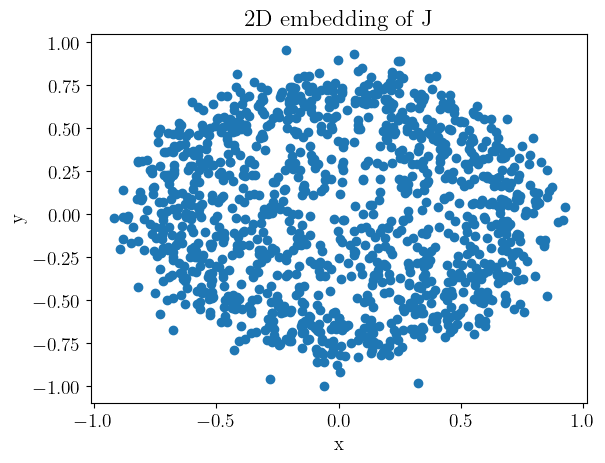

Number of points 1200
RMSE of the cloud points to a sphere: 
0.12117695090351954
Number of points in a sphere of radius 0.5: 


82

In [25]:
X3_long=[]
X2_long=[]
m_list=[]
m1_list=[]
range_k=100
for k in range(range_k):
    random_array = np.random.rand(12, 12)
    d_rand = (random_array + random_array.T) / 2
    np.fill_diagonal(d_rand, 0)
    X2,X3,m1,m=mapData(d_rand,False)
    X3_long.append(X3)
    m_list.append(m)
    X2_long.append(X2)
    m1_list.append(m1)
X3_long_array=np.concatenate(X3_long, axis=0)
X2_long_array=np.concatenate(X2_long, axis=0)

m=max(m_list)
m1=max(m1_list)

plt.scatter(X2_long_array[:,0]/m1,X2_long_array[:,1]/m1)
plt.title("2D embedding of J")
plt.xlabel("x")
plt.ylabel("y")
output_dir = 'plots'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it does not exist
plt.savefig(os.path.join(output_dir, f'2D_embedding_rd_avg.png'))
plt.show()

fig = go.Figure(data=go.Scatter3d(x=X3_long_array[:, 0], y=X3_long_array[:, 1], z=X3_long_array[:, 2], mode='markers',marker=dict(size=2)))

fig.update_layout(
scene=dict(
            xaxis=dict(range=[-m, m]),
            yaxis=dict(range=[-m, m]),
            zaxis=dict(range=[-m, m]),
            aspectmode='cube'))

fig.show()

r,x0,y0,z0, rmse=sphereFit(X3_long_array[:,0]/m,X3_long_array[:,1]/m,X3_long_array[:,2]/m)
print(f"Number of points {range_k*12}")
print("RMSE of the cloud points to a sphere: ")
print(rmse)
print("Number of points in a sphere of radius 0.5: ")
count_points_in_sphere(X3_long_array[:,0]/m, X3_long_array[:,1]/m, X3_long_array[:,2]/m, 0.5)

Shortest path from 0 to 0 is 0
Shortest path from 0 to 2 is 1
Shortest path from 0 to 1 is 3
Shortest path from 0 to 4 is 3
Shortest path from 0 to 3 is 5
Shortest path from 1 to 1 is 0
Shortest path from 1 to 3 is 2
Shortest path from 1 to 0 is 3
Shortest path from 1 to 4 is 3
Shortest path from 1 to 2 is 4
Shortest path from 2 to 2 is 0
Shortest path from 2 to 0 is 1
Shortest path from 2 to 4 is 2
Shortest path from 2 to 3 is 4
Shortest path from 2 to 1 is 4
Shortest path from 3 to 3 is 0
Shortest path from 3 to 1 is 2
Shortest path from 3 to 2 is 4
Shortest path from 3 to 4 is 5
Shortest path from 3 to 0 is 5
Shortest path from 4 to 4 is 0
Shortest path from 4 to 2 is 2
Shortest path from 4 to 1 is 3
Shortest path from 4 to 0 is 3
Shortest path from 4 to 3 is 5


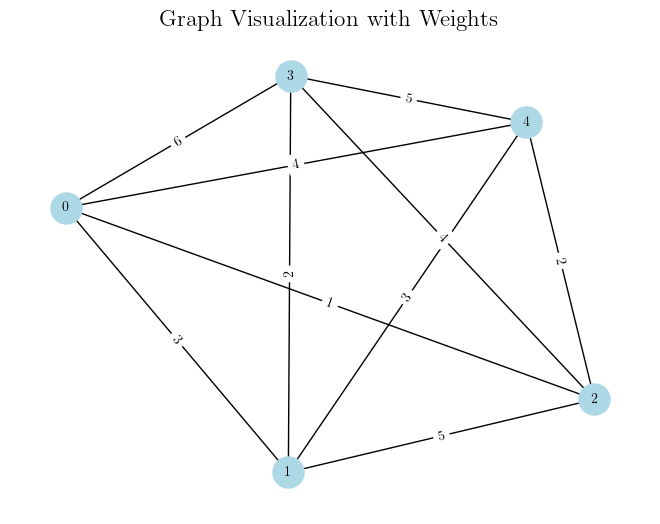

Does the coupling strength also give us the sphere/does it work as well as mutual information?

In [ ]:
#Run a simulation where couplings are used in calculating a distance matrix.


#Extract the X3 data

#plot it and calculate Rmse and count.


range_k=31
folder = 'goe_xxyyzz'
N=12
state_number=0

X3_long=[]
m_list=[]
for k in range(range_k):
    file_name=folder+f"{N}_{k}_{state_number}"
    dab=load_d(file_name)
    X2,X3,m1,m=mapData(dab,False)
    X3_long.append(X3)
    m_list.append(m)
X3_long_array=np.concatenate(X3_long, axis=0)


m=max(m_list)

fig = go.Figure(data=go.Scatter3d(x=X3_long_array[:, 0]/m, y=X3_long_array[:, 1]/m, z=X3_long_array[:, 2]/m, mode='markers'))

fig.update_layout(
scene=dict(
            xaxis=dict(range=[-1, 1]),
            yaxis=dict(range=[-1, 1]),
            zaxis=dict(range=[-1, 1]),
            aspectmode='cube'))
        
fig.show()

r,x0,y0,z0, rmse=sphereFit(X3_long_array[:,0]/m,X3_long_array[:,1]/m,X3_long_array[:,2]/m)
print(f"Number of points {range_k*12}")
print(rmse)

count_points_in_sphere(X3_long_array[:,0]/m, X3_long_array[:,1]/m, X3_long_array[:,2]/m, 0.6)